<a href="https://colab.research.google.com/github/prashanthdnss/Nithya_INFO5731_Fall2020/blob/master/In_class_exercise/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 10/21/2020)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
import nltk; nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
pip install spacy

In [3]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=d7cad754da042fdcb07442e700a902bce3b77b28be94fae7ae167e4f05adaed6
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [4]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [44]:
titles = open("Titles.txt").read()
titles


"Titles\n\nConstrained k-means clustering with background knowledge. \n\nThe global k-means clustering algorithm. \n\nAn efficient k-means clustering algorithm: Analysis and implementation. \n\nWeb-scale k-means clustering. K-means clustering via principal component analysis. \n\nAn efficient k-means clustering algorithm. Refining initial points for k-means clustering. \n\nSpectral relaxation for k-means clustering\n\nParallel K-Means Clustering Based on MapReduce\n\n[PDF][PDF] Constrained k-means clustering\n\nAlgorithm AS 136: A k-means clustering algorithm\n\nImage segmentation using K-means clustering algorithm and subtractive clustering algorithm\n\nCluster center initialization algorithm for K-means clustering\n\nK‐means clustering: a half‐century synthesis\n\nAn efficient k′-means clustering algorithm\n\nResearch on k-means clustering algorithm: An improved k-means clustering algorithm\n\nSelection of K in K-means clustering\n\n Improving the Accuracy and Efficiency of the k-mea

In [45]:
import pandas as pd
df = pd.read_fwf('Titles.txt')
df

,Titles
0,Constrained k-means clustering with background...
1,The global k-means clustering algorithm.
2,An efficient k-means clustering algorithm: Ana...
3,Web-scale k-means clustering. K-means clusteri...
4,An efficient k-means clustering algorithm. Ref...
...,...
93,An improved overlapping k-means clustering met...
94,An efficient approximation to the K-means clus...
95,A simple linear time (1+/spl epsiv/)-approxima...
96,Fast and exact out-of-core and distributed k-m...


In [65]:
# Convert to list
data = df.Titles.values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', i) for i in data]

print(data)

['Constrained k-means clustering with background knowledge.', 'The global k-means clustering algorithm.', 'An efficient k-means clustering algorithm: Analysis and implementation.', 'Web-scale k-means clustering. K-means clustering via principal component analysis.', 'An efficient k-means clustering algorithm. Refining initial points for k-means clustering.', 'Spectral relaxation for k-means clustering', 'Parallel K-Means Clustering Based on MapReduce', '[PDF][PDF] Constrained k-means clustering', 'Algorithm AS 136: A k-means clustering algorithm', 'Image segmentation using K-means clustering algorithm and subtractive clustering algorithm', 'Cluster center initialization algorithm for K-means clustering', 'K‐means clustering: a half‐century synthesis', 'An efficient k′-means clustering algorithm', 'Research on k-means clustering algorithm: An improved k-means clustering algorithm', 'Selection of K in K-means clustering', 'Improving the Accuracy and Efficiency of the k-means Clustering A

In [67]:
def s_to_w(ss):
    for sentence in ss:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(s_to_w(data))

print(data_words)

[['constrained', 'means', 'clustering', 'with', 'background', 'knowledge'], ['the', 'global', 'means', 'clustering', 'algorithm'], ['an', 'efficient', 'means', 'clustering', 'algorithm', 'analysis', 'and', 'implementation'], ['web', 'scale', 'means', 'clustering', 'means', 'clustering', 'via', 'principal', 'component', 'analysis'], ['an', 'efficient', 'means', 'clustering', 'algorithm', 'refining', 'initial', 'points', 'for', 'means', 'clustering'], ['spectral', 'relaxation', 'for', 'means', 'clustering'], ['parallel', 'means', 'clustering', 'based', 'on', 'mapreduce'], ['pdf', 'pdf', 'constrained', 'means', 'clustering'], ['algorithm', 'as', 'means', 'clustering', 'algorithm'], ['image', 'segmentation', 'using', 'means', 'clustering', 'algorithm', 'and', 'subtractive', 'clustering', 'algorithm'], ['cluster', 'center', 'initialization', 'algorithm', 'for', 'means', 'clustering'], ['means', 'clustering', 'half', 'century', 'synthesis'], ['an', 'efficient', 'means', 'clustering', 'algori

In [68]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['constrained', 'means', 'clustering', 'with', 'background', 'knowledge']


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [69]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [70]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['constrained', 'cluster', 'background', 'knowledge']]


In [71]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [72]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('background', 1), ('cluster', 1), ('constrained', 1), ('knowledge', 1)]]

In [73]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [74]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.197*"cluster" + 0.197*"mean" + 0.055*"improve" + 0.033*"would" + '
  '0.017*"stability" + 0.017*"use" + 0.017*"century" + 0.017*"half" + '
  '0.017*"synthesis" + 0.017*"integrate"'),
 (1,
  '0.122*"cluster" + 0.122*"mean" + 0.049*"reduction" + 0.025*"fuzzy" + '
  '0.025*"perspective" + 0.025*"measure" + 0.025*"distribution" + '
  '0.025*"dynamic" + 0.025*"validation" + 0.025*"programming"'),
 (2,
  '0.111*"mean" + 0.111*"cluster" + 0.111*"genetic" + 0.057*"rearrangement" + '
  '0.057*"algorithm" + 0.003*"metric" + 0.003*"anomalous" + 0.003*"weight" + '
  '0.003*"dynamic" + 0.003*"programming"'),
 (3,
  '0.155*"mean" + 0.155*"cluster" + 0.045*"analysis" + 0.023*"weighting" + '
  '0.023*"improve" + 0.023*"right" + 0.023*"initial" + 0.023*"use" + '
  '0.023*"enhance" + 0.023*"strong"'),
 (4,
  '0.213*"cluster" + 0.201*"mean" + 0.025*"algorithm" + 0.025*"selection" + '
  '0.013*"efficient" + 0.013*"modify" + 0.013*"isolate" + 0.013*"partition" + '
  '0.013*"dynamic" + 0.013*"numb

In [75]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.523691767040382

Coherence Score:  0.5123897146913958


In [76]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.117194  0.059836       1        1  12.249443
19    -0.074088 -0.134625       2        1  11.575647
0     -0.107031  0.033172       3        1  10.005565
15    -0.062828 -0.075257       4        1   9.238853
3     -0.071417  0.040946       5        1   6.359620
1     -0.012712  0.021304       6        1   5.783058
10    -0.061885 -0.043636       7        1   5.524919
16    -0.018828  0.072094       8        1   4.959156
11     0.006040 -0.056634       9        1   4.414146
12     0.000581  0.048232      10        1   4.018228
18     0.062749 -0.013330      11        1   3.933359
13     0.043155  0.062393      12        1   3.737758
9     -0.020834  0.065298      13        1   3.648260
17     0.058740 -0.114270      14        1   3.270890
5      0.041761 -0.037895      15        1   3.085215
7      0.015638  0.003017      16        1   2.444614
2      0.028900  0.011250      17        1   1.789321
6      0.035244  0.030205      18        1   1.781222
8      0.081226  0.004716      19        1   1.695541
14     0.172781  0.023184      20        1   0.485187, topic_info=             Term       Freq      Total Category  logprob  loglift
22   segmentation   6.000000   6.000000  Default  30.0000  30.0000
24            use  10.000000  10.000000  Default  29.0000  29.0000
40      algorithm   8.000000   8.000000  Default  28.0000  28.0000
21          image   6.000000   6.000000  Default  27.0000  27.0000
18           base   4.000000   4.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
55        hotspot   0.012373   1.450754  Topic20  -5.3423   0.5641
54       accident   0.012373   1.450754  Topic20  -5.3423   0.5641
76      spherical   0.012373   2.074049  Topic20  -5.3423   0.2067
91       adaptive   0.012373   4.575778  Topic20  -5.3423  -0.5846
101   conditional   0.012373   1.404777  Topic20  -5.3423   0.5963

[886 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
120       8  0.731291   academic
54        1  0.689297   accident
33        3  0.658529   accuracy
124       5  0.710760      adapt
91        2  0.437084   adaptive
...     ...       ...        ...
44       12  0.479980  weighting
180       3  0.658529   wireless
146       1  0.689297       work
177       3  0.841776      would
105       6  0.711857      yeast

[331 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 20, 1, 16, 4, 2, 11, 17, 12, 13, 19, 14, 10, 18, 6, 8, 3, 7, 9, 15])

In [79]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2020-10-23 01:16:31--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  12.8MB/s    in 1.2s    

2020-10-23 01:16:33 (12.8 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [81]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [103]:
mallet_path = "/content/mallet-2.0.8/bin/mallet"

In [104]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [105]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('image', 0.36363636363636365),
   ('wireless', 0.045454545454545456),
   ('satellite', 0.045454545454545456),
   ('element', 0.045454545454545456),
   ('fusion', 0.045454545454545456),
   ('privacy', 0.045454545454545456),
   ('color', 0.045454545454545456),
   ('principal', 0.045454545454545456),
   ('distribution', 0.045454545454545456),
   ('yeast', 0.045454545454545456)]),
 (12,
  [('improve', 0.30434782608695654),
   ('reduction', 0.13043478260869565),
   ('unsupervised', 0.043478260869565216),
   ('rank', 0.043478260869565216),
   ('measure', 0.043478260869565216),
   ('sql', 0.043478260869565216),
   ('partition', 0.043478260869565216),
   ('vertically', 0.043478260869565216),
   ('industrial', 0.043478260869565216),
   ('medical', 0.043478260869565216)]),
 (9,
  [('algorithm', 0.22727272727272727),
   ('adaptive', 0.09090909090909091),
   ('online', 0.09090909090909091),
   ('component', 0.045454545454545456),
   ('initialization', 0.045454545454545456),
   ('high', 0.

In [106]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [107]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


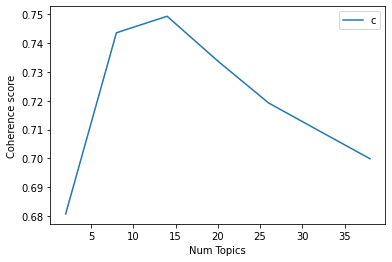

In [108]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [109]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6808
Num Topics = 8  has Coherence Value of 0.7435
Num Topics = 14  has Coherence Value of 0.7493
Num Topics = 20  has Coherence Value of 0.7337
Num Topics = 26  has Coherence Value of 0.7192
Num Topics = 32  has Coherence Value of 0.7095
Num Topics = 38  has Coherence Value of 0.6999


In [110]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.400*"cluster" + 0.033*"spherical" + 0.033*"histogram" + 0.033*"parallel" '
  '+ 0.033*"watershed" + 0.033*"substitute" + 0.033*"color" + 0.033*"deci" + '
  '0.033*"half" + 0.033*"privacy"'),
 (1,
  '0.316*"segmentation" + 0.105*"algorithm" + 0.053*"research" + '
  '0.053*"constrain" + 0.053*"change" + 0.053*"class" + 0.053*"system" + '
  '0.053*"traffic" + 0.053*"imputation" + 0.053*"thinking"'),
 (2,
  '0.350*"improve" + 0.100*"efficient" + 0.100*"big" + 0.050*"conditional" + '
  '0.050*"clustering" + 0.050*"initialization" + 0.050*"relaxation" + '
  '0.050*"arbitrarily" + 0.050*"feature" + 0.050*"determine"'),
 (3,
  '0.400*"datum" + 0.250*"efficient" + 0.050*"study" + 0.050*"subtractive" + '
  '0.050*"cut" + 0.050*"rough" + 0.050*"wavelet" + 0.050*"tree" + '
  '0.050*"enhance" + 0.000*"metric"'),
 (4,
  '0.333*"adaptive" + 0.111*"time" + 0.111*"hardness" + 0.111*"distribution" + '
  '0.111*"detection" + 0.111*"signal" + 0.111*"exact" + 0.000*"moving" + '
  '0.000*"initiali

In [111]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,17.0,0.0751,"base, dimension, review, mapreduce, bearing, p...",Constrained k-means clustering with background...
1,1,8.0,0.0609,"cluster, lattice, effect, map, empirical, miss...",The global k-means clustering algorithm.
2,2,14.0,0.0628,"analysis, image, roll, weighting, result, hurt...",An efficient k-means clustering algorithm: Ana...
3,3,14.0,0.0692,"analysis, image, roll, weighting, result, hurt...",Web-scale k-means clustering. K-means clusteri...
4,4,6.0,0.0665,"cluster, point, accident, medical, consistency...",An efficient k-means clustering algorithm. Ref...
5,5,7.0,0.0681,"cluster, fuzzy, brain, validation, large, comp...",Spectral relaxation for k-means clustering
6,6,17.0,0.0765,"base, dimension, review, mapreduce, bearing, p...",Parallel K-Means Clustering Based on MapReduce
7,7,1.0,0.0673,"segmentation, algorithm, research, constrain, ...",[PDF][PDF] Constrained k-means clustering
8,8,6.0,0.0534,"cluster, point, accident, medical, consistency...",Algorithm AS 136: A k-means clustering algorithm
9,9,1.0,0.0616,"segmentation, algorithm, research, constrain, ...",Image segmentation using K-means clustering al...


In [112]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.0833,"cluster, spherical, histogram, parallel, water...",K-Means+ ID3: A novel method for supervised an...
1,1.0,0.0673,"segmentation, algorithm, research, constrain, ...",[PDF][PDF] Constrained k-means clustering
2,2.0,0.0673,"improve, efficient, big, conditional, clusteri...",Improved K-means clustering algorithm
3,3.0,0.0758,"datum, efficient, study, subtractive, cut, rou...",An efficient approximation to the K-means clus...
4,4.0,0.0673,"adaptive, time, hardness, distribution, detect...",The hardness of k-means clustering


In [113]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,17.0,"base, dimension, review, mapreduce, bearing, p...",7.0,0.0714
1.0,8.0,"cluster, lattice, effect, map, empirical, miss...",7.0,0.0714
2.0,14.0,"analysis, image, roll, weighting, result, hurt...",6.0,0.0612
3.0,14.0,"analysis, image, roll, weighting, result, hurt...",10.0,0.1020
4.0,6.0,"cluster, point, accident, medical, consistency...",6.0,0.0612
...,...,...,...,...
93.0,18.0,"center, initial, method, component, implementa...",NaN,NaN
94.0,3.0,"datum, efficient, study, subtractive, cut, rou...",NaN,NaN
95.0,17.0,"base, dimension, review, mapreduce, bearing, p...",NaN,NaN
96.0,4.0,"adaptive, time, hardness, distribution, detect...",NaN,NaN


## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [118]:
# Write your code here
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


In [119]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [120]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [121]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [122]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [123]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [124]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

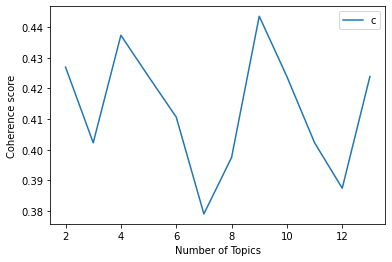

In [130]:
start,stop,step=2,14,1
plot_graph(clean_text,start,stop,step)

In [117]:
# LSA Model
number_of_topics=7
words=10
document_list,titles=load_data("","Titles.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 198
[(0, '-0.565*"cluster" + -0.549*"k" + -0.540*"mean" + -0.224*"algorithm" + -0.070*"use" + -0.047*"data" + -0.047*"improv" + -0.045*"effici" + -0.045*"segment" + -0.044*"imag"'), (1, '-0.857*"algorithm" + -0.186*"improv" + 0.165*"k" + 0.145*"data" + 0.121*"mean" + -0.101*"center" + -0.101*"initi" + -0.098*"effici" + 0.088*"detect" + 0.078*"coreset"'), (2, '-0.504*"use" + -0.445*"imag" + -0.431*"segment" + 0.198*"k" + -0.190*"pdf" + -0.134*"cluster" + 0.130*"method" + 0.125*"effici" + -0.116*"adapt" + 0.108*"data"'), (3, '0.426*"method" + 0.353*"detect" + 0.331*"id3" + 0.294*"tree" + 0.281*"anomali" + 0.246*"decis" + 0.246*"cascad" + -0.224*"cluster" + 0.185*"use" + 0.166*"supervis"'), (4, '0.433*"data" + 0.353*"use" + -0.269*"k" + -0.245*"coreset" + -0.211*"base" + -0.209*"segment" + -0.202*"median" + -0.171*"applic" + -0.170*"space" + -0.132*"imag"'), (5, '0.500*"data" + 0.273*"segment" + 0.229*"imag" + 0.218*"fuzzi" + -0.207*"use" + 0.204*"method" + -0.1

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)
For first model:LDA
Coherence Score:  0.5123897146913958
Although we have given the number of topics initially as 20. From the graph it can be seen as the optimal_model
number of topics for LDA model is 14.

Second model:LSA
Since Coherence value is high for topic no. 7. The optimum number of topics is 7.bit_length
Coherence from graph shown is 0.45 (approximately)

According to the statistics, LDA model is good since the cohenrence score is more.
